# Explore here

In [36]:
#pip install -r /workspaces/regesion-lineal-reyna/requirements.txt

In [37]:
# Your code here
import pandas as pd

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv")
total_data.head ()



,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#Variables predictoras: 
age. Edad del beneficiario principal (numérico)
sex. Género del beneficiario principal (categórico)
bmi. Indice de masa corporal (numérico)
children. Número de niños/dependientes cubiertos por el seguro de salud (numérico)
smoker. ¿Es fumador? (categórico)
region. Área residencial del beneficiario en USA: noreste, sureste, suroeste, noroeste (categórico)

#Variable dependiente
charges. Prima del seguro médico (numerico)

In [38]:
#### dimensiones del dataframe
total_data.shape
##### datos null y tipo de datos que hay en mi dataframe
total_data.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [39]:
##### Para ver falta de data
total_data.isnull().sum ()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [40]:
###duplicados
total_data = total_data.drop_duplicates().reset_index(drop = True)
total_data.head()



,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


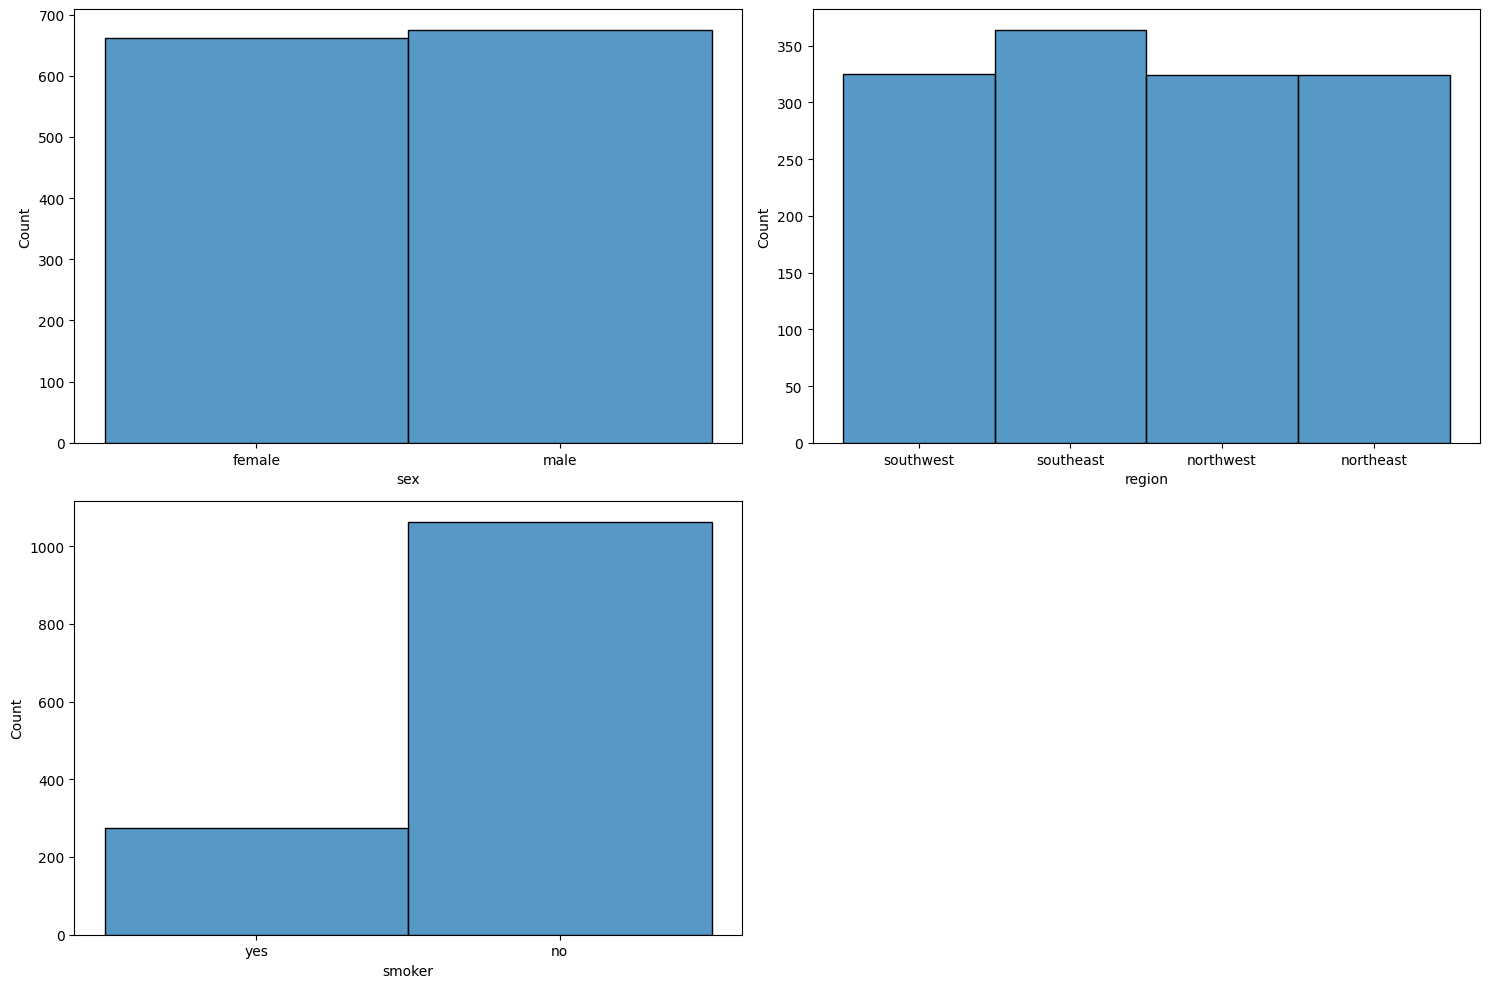

In [41]:
### Variables Categoricas
import matplotlib.pyplot as plt 
import seaborn as sns


fig, axis = plt.subplots(2,2, figsize = (15, 10))

# Crear un histograma múltiple

sns.histplot(ax = axis[0,0], data = total_data, x = "sex")
sns.histplot(ax = axis[0,1], data = total_data, x = "region")
sns.histplot(ax = axis[1,0], data = total_data, x = "smoker")


fig.delaxes(axis[1, 1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

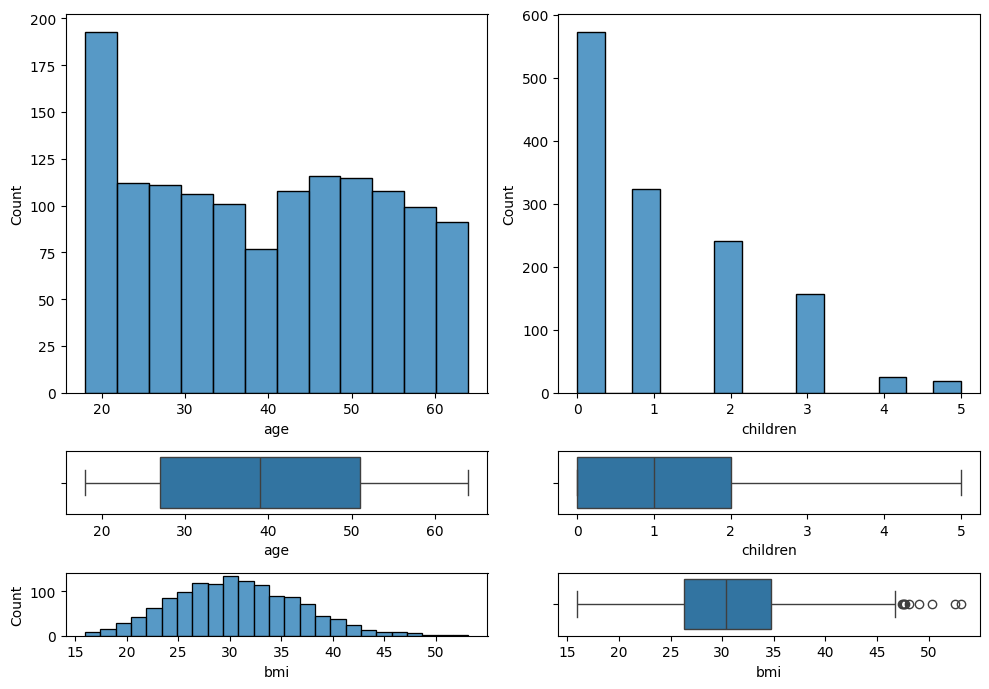

In [42]:
###Variables numéricas
fig, axis = plt.subplots(3, 2, figsize = (10, 7), gridspec_kw={'height_ratios': [6, 1, 1]})

# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax = axis[0, 0], data = total_data, x = "age")
sns.boxplot(ax = axis[1, 0], data = total_data, x = "age")
sns.histplot(ax = axis[0, 1], data = total_data, x = "children")
sns.boxplot(ax = axis[1, 1], data = total_data, x = "children")
sns.histplot(ax = axis[2,0], data = total_data, x = "bmi")
sns.boxplot(ax = axis[2, 1], data = total_data, x = "bmi")


# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

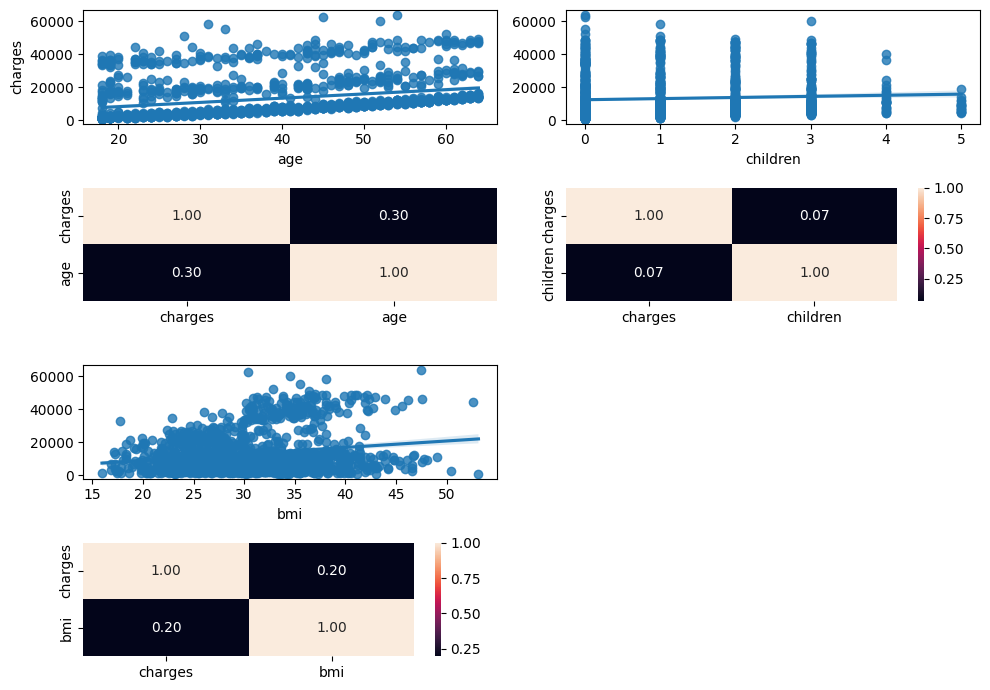

In [43]:
### Multivariado: Análisis numérico-numérico

fig, axis = plt.subplots(4, 2, figsize = (10, 7))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = total_data, x = "age", y = "charges")
sns.heatmap(total_data[["charges", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = total_data, x = "children", y = "charges").set(ylabel=None)
sns.heatmap(total_data[["charges", "children"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])
sns.regplot(ax = axis[2, 0], data = total_data, x = "bmi", y = "charges").set(ylabel=None)
sns.heatmap(total_data[["charges", "bmi"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0])

fig.delaxes(axis[2, 1])
fig.delaxes(axis[3, 1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

In [44]:
###Factorizar la variable
total_data["sex"] = pd.factorize(total_data["sex"])[0]
total_data["region"] = pd.factorize(total_data["region"])[0]
total_data["smoker"] = pd.factorize(total_data["smoker"])[0]


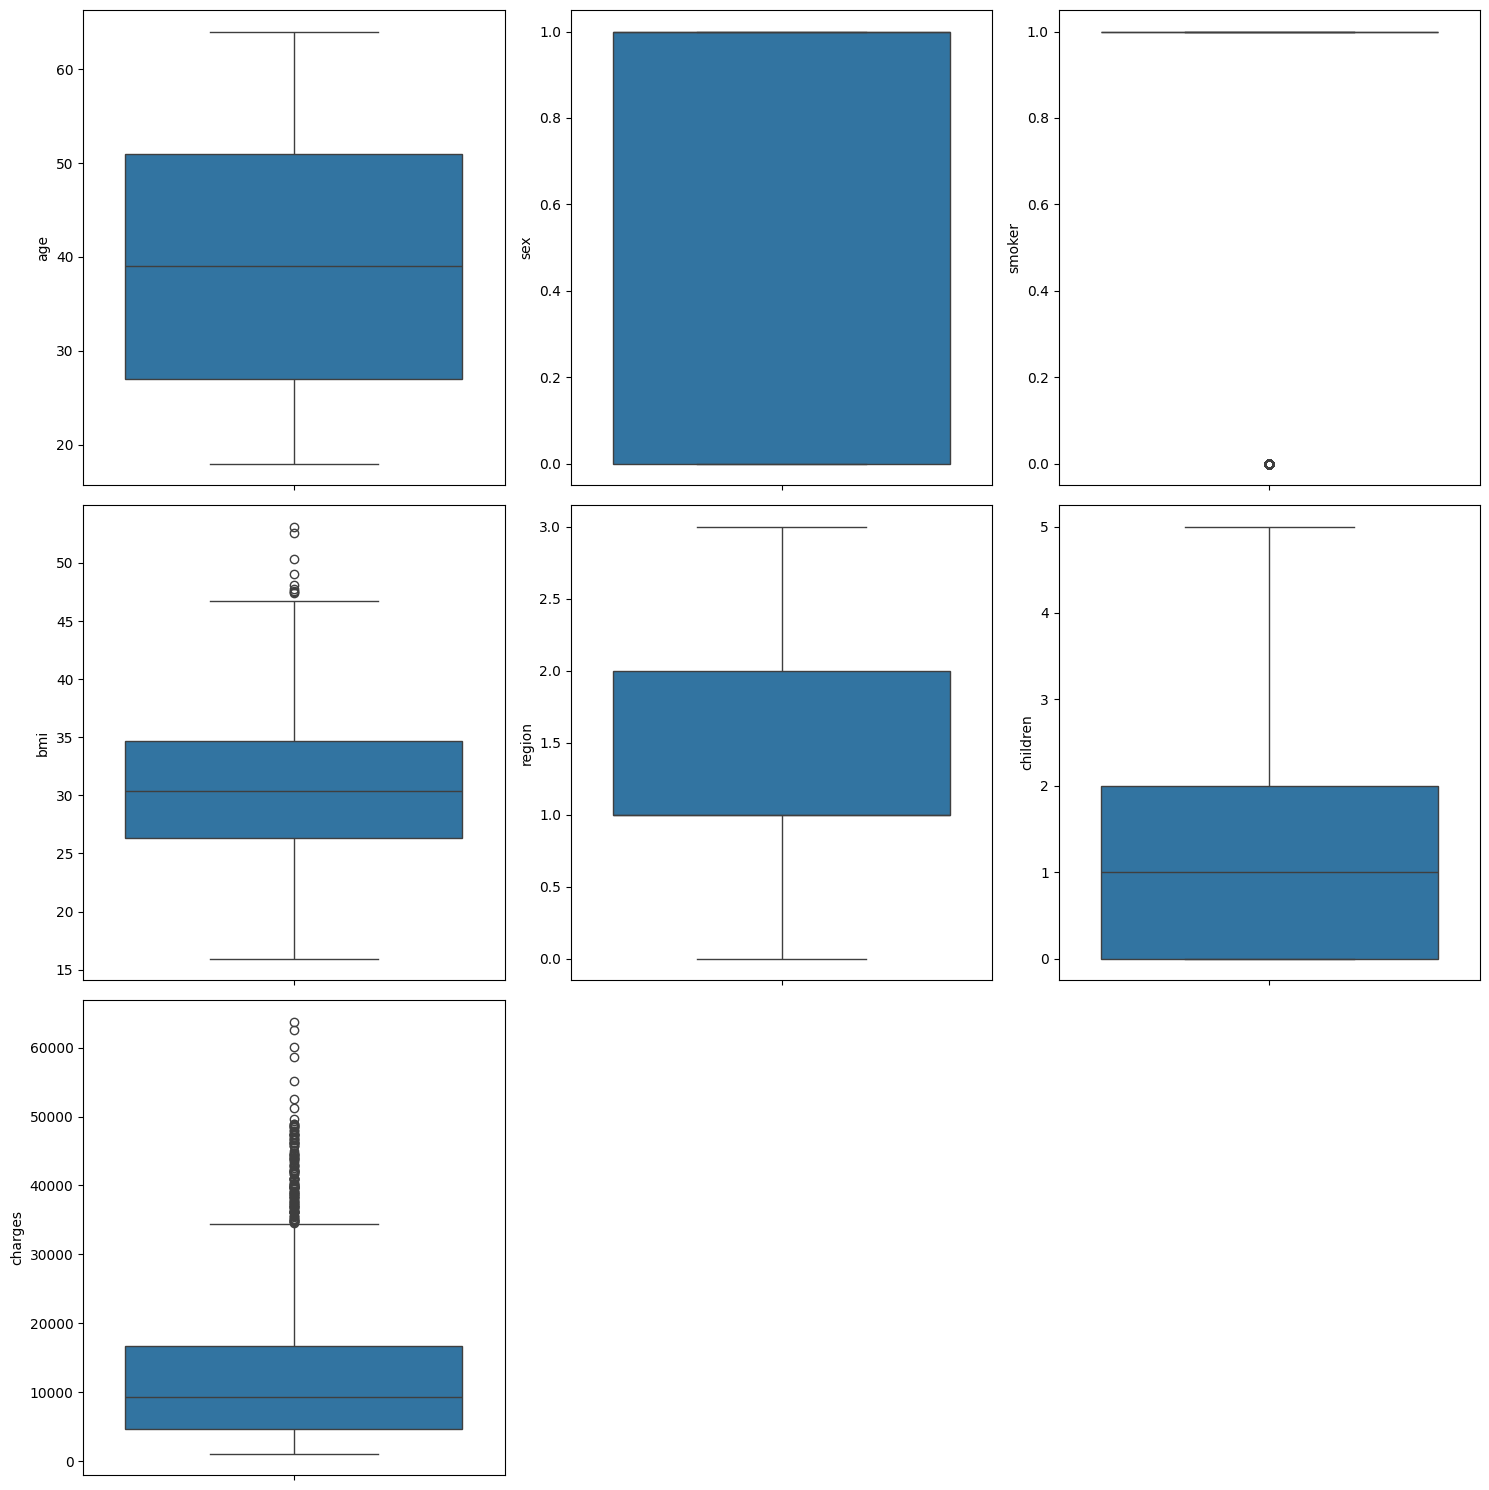

In [45]:
#outlaiers

fig, axis = plt.subplots(3, 3, figsize = (15, 15))

sns.boxplot(ax = axis[0, 0], data = total_data, y = "age")
sns.boxplot(ax = axis[0, 1], data = total_data, y = "sex")
sns.boxplot(ax = axis[0, 2], data = total_data, y = "smoker")
sns.boxplot(ax = axis[1, 0], data = total_data, y = "bmi")
sns.boxplot(ax = axis[1, 1], data = total_data, y = "region") 	
sns.boxplot(ax = axis[1, 2], data = total_data, y = "children")
sns.boxplot(ax = axis[2, 0], data = total_data, y = "charges")
fig.delaxes(axis[2, 1])
fig.delaxes(axis[2, 2])


plt.tight_layout()

plt.show()

In [46]:
################OTRA FORMA DE HACER LAS CORRELACIONES (TABLA)

import warnings
import pandas as pd
warnings.filterwarnings("ignore", category=FutureWarning)

# Calcula la matriz de correlación
correlation_matrix = total_data.corr()

# Crea un DataFrame para almacenar las relaciones
relations_df = pd.DataFrame(columns=['Variable', 'Related Variable', 'Correlation'])

# Llena el DataFrame con las relaciones
for column in correlation_matrix.columns:
    related_columns = correlation_matrix.index[abs(correlation_matrix[column]) > 0.35].tolist()
    related_columns.remove(column)
    if related_columns:
        for related_column in related_columns:
            correlation_value = correlation_matrix.loc[column, related_column]
            # Create a new DataFrame for each iteration
            new_row = pd.DataFrame({'Variable': [column], 'Related Variable': [related_column], 'Correlation': [correlation_value]})
            relations_df = pd.concat([relations_df, new_row], ignore_index=True)
print (correlation_matrix)

               age       sex       bmi  children    smoker    region   charges
age       1.000000 -0.019814  0.109344  0.041536  0.025587 -0.001626  0.298308
sex      -0.019814  1.000000  0.046397  0.017848 -0.076596 -0.004936  0.058044
bmi       0.109344  0.046397  1.000000  0.012755 -0.003746 -0.157574  0.198401
children  0.041536  0.017848  0.012755  1.000000 -0.007331 -0.016258  0.067389
smoker    0.025587 -0.076596 -0.003746 -0.007331  1.000000 -0.002358 -0.787234
region   -0.001626 -0.004936 -0.157574 -0.016258 -0.002358  1.000000  0.006547
charges   0.298308  0.058044  0.198401  0.067389 -0.787234  0.006547  1.000000


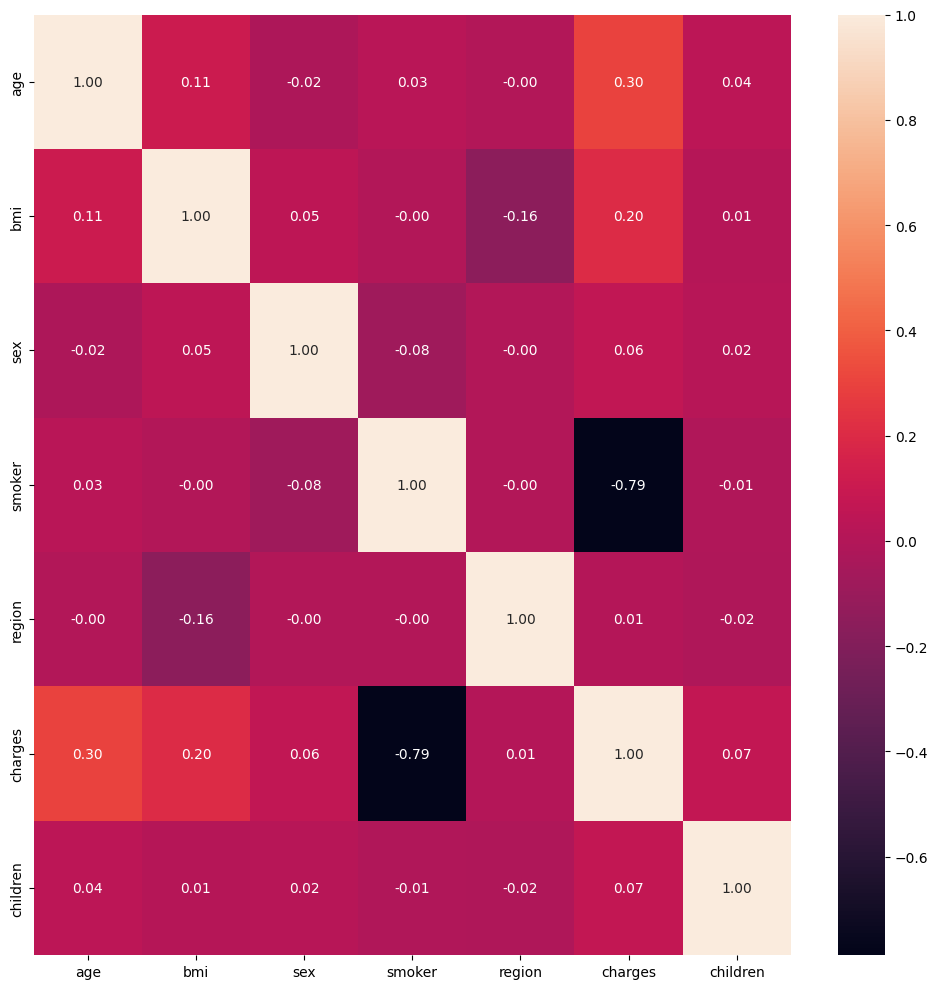

In [47]:
fig, axis = plt.subplots(figsize = (10, 10))

sns.heatmap(total_data[["age", "bmi", "sex", "smoker", "region", "charges", "children" ]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

In [48]:

total_data["smoker"] = pd.factorize(total_data["smoker"])[0]

from sklearn.model_selection import train_test_split
num_variables = ["age", "bmi", "sex", "smoker", "region", "children"]


# We divide the dataset into training and test samples
X = total_data.drop("charges", axis = 1)[num_variables]
y = total_data["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


X_train.head()

,age,bmi,sex,smoker,region,children
1113,23,24.510,1,1,3,0
967,21,25.745,1,1,3,2
598,52,37.525,0,1,2,2
170,63,41.470,1,1,1,0
275,47,26.600,0,1,3,2


In [49]:
#############Escalado de valores (Normalización)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_norm = scaler.transform(X_train)
X_train_norm = pd.DataFrame(X_train_norm, index = X_train.index, columns = num_variables)

X_test_norm = scaler.transform(X_test)
X_test_norm = pd.DataFrame(X_test_norm, index = X_test.index, columns = num_variables)

X_train_norm.head()

,age,bmi,sex,smoker,region,children
1113,-1.157680,-0.996928,0.971409,0.500292,1.383946,-0.907908
967,-1.300619,-0.792762,0.971409,0.500292,1.383946,0.766904
598,0.914926,1.154664,-1.029432,0.500292,0.477983,0.766904
170,1.701087,1.806837,0.971409,0.500292,-0.427981,-0.907908
275,0.557580,-0.651417,-1.029432,0.500292,1.383946,0.766904


In [50]:
from sklearn.feature_selection import SelectKBest, f_classif
import pandas as pd

# Con un valor de k = x queremos decir implícitamente que queremos eliminar x características del conjunto de datos
selection_model = SelectKBest(f_classif, k=5)
selection_model.fit(X_train_norm, y_train)
ix = selection_model.get_support()

# Utiliza directamente X_train.columns[ix] para seleccionar las columnas
X_train_sel = pd.DataFrame(selection_model.transform(X_train_norm), columns=X_train.columns[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test_norm), columns=X_test.columns[ix])

X_train_sel.head()

/home/vscode/.local/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:109: RuntimeWarning: invalid value encountered in divide
  msw = sswn / float(dfwn)


,bmi,sex,smoker,region,children
0,-0.996928,0.971409,0.500292,1.383946,-0.907908
1,-0.792762,0.971409,0.500292,1.383946,0.766904
2,1.154664,-1.029432,0.500292,0.477983,0.766904
3,1.806837,0.971409,0.500292,-0.427981,-0.907908
4,-0.651417,-1.029432,0.500292,1.383946,0.766904


In [51]:
X_train_sel["charges"] = y_train.values
X_test_sel["charges"] = y_test.values
X_train_sel.to_csv("../data/processed/clean_train.csv", index = False)
X_test_sel.to_csv("../data/processed/clean_test.csv", index = False)

In [59]:
train_data = pd.read_csv("../data/processed/clean_train.csv")
test_data = pd.read_csv("../data/processed/clean_test.csv")

train_data.head()

,bmi,sex,smoker,region,children,charges
0,-0.996928,0.971409,0.500292,1.383946,-0.907908,2396.09590
1,-0.792762,0.971409,0.500292,1.383946,0.766904,3279.86855
2,1.154664,-1.029432,0.500292,0.477983,0.766904,33471.97189
3,1.806837,0.971409,0.500292,-0.427981,-0.907908,13405.39030
4,-0.651417,-1.029432,0.500292,1.383946,0.766904,9715.84100


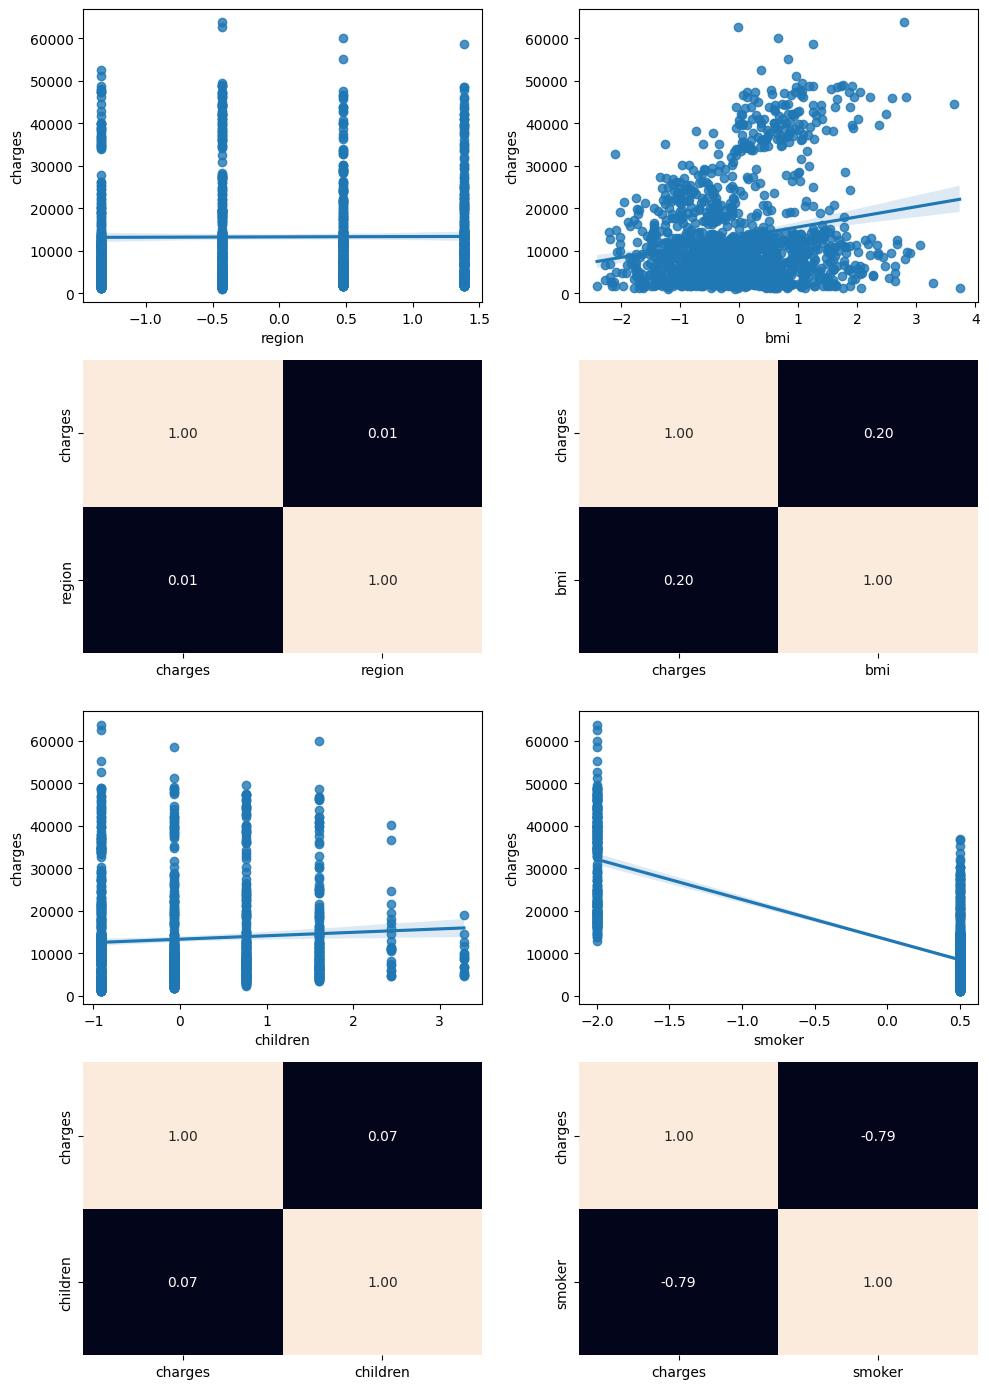

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(4, 2, figsize = (10, 14))
total_data = pd.concat([train_data, test_data])

sns.regplot(data = total_data, x = "region", y = "charges", ax = axis[0, 0])
sns.heatmap(total_data[["charges", "region"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(data = total_data, x = "bmi", y = "charges", ax = axis[0, 1])
sns.heatmap(total_data[["charges", "bmi"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)

sns.regplot(data = total_data, x = "children", y = "charges", ax = axis[2, 0])
sns.heatmap(total_data[["charges", "children"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0], cbar = False)

sns.regplot(data = total_data, x = "smoker", y = "charges", ax = axis[2, 1])
sns.heatmap(total_data[["charges", "smoker"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1], cbar = False)

plt.tight_layout()
plt.show()

In [54]:
X_train = train_data.drop(["charges"], axis = 1)
y_train = train_data["charges"]
X_test = test_data.drop(["charges"], axis = 1)
y_test = test_data["charges"]

In [55]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,  y_train)


LinearRegression()

In [56]:
print(f"Intercepto (a): {model.intercept_}")
print(f"Coeficientes (b): {model.coef_}")

Intercepto (a): 13030.203369289055
Coeficientes (b): [ 2328.18954684  -160.43365848 -9102.69758604   324.12992968
   836.74493197]


In [57]:
y_pred = model.predict(X_test)
y_pred

array([ 4920.35030699,  8350.56286916, 12388.18101318, 34048.09544708,
       11844.53332217, 11505.83215445, 34839.59623623,  5047.42755931,
       10406.39916314,  9105.46791595,  4399.23780152, 29240.24899816,
       32647.84001069, 12629.71506397, 12639.29350057,  7821.32173583,
        8775.64347736, 32664.81395592,  5896.88328288,  8077.82863506,
        8689.60033196, 30490.54450493, 13816.70383293, 29715.43902633,
       32705.78374842, 10627.12009758, 35676.38096242, 30746.73830598,
        9123.14471587, 12769.00924273,  8532.14237967, 10635.78624257,
        5343.58049693,  6658.76117911, 36984.59964814,  9558.51102419,
       10205.92126895,  6062.5518183 , 26460.22465244,  7485.10159155,
       11896.06079544, 28440.83838015, 34362.56813371,  9387.17168745,
        5361.85649028,  5624.7590952 , 12078.88244847,  7903.49395465,
        6964.71399045,  9515.96279409, 10090.990988  , 12671.98839551,
       29751.18123547,  8495.61095174, 10554.02433904,  8880.89810461,
      

In [58]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"Error cuadrático medio: {mean_squared_error(y_test, y_pred)}")
print(f"Coeficiente de determinación: {r2_score(y_test, y_pred)}")

Error cuadrático medio: 52297728.18725642
Coeficiente de determinación: 0.7153959056526191
